# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0
        Params = {"q": city, "appid": weather_api_key, "units": "metric"}
        city_url = requests.get(base_url, params=Params).json()
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        record_count += 1
    try:
        city_weather = city_url["weather"]
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp = city_url["main"]["temp_max"]
        city_humidity = city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]

        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date,
            }
        )
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. 

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          495
Lat           495
Lng           495
Max Temp      495
Humidity      495
Cloudiness    495
Wind Speed    495
Country       495
Date          495
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howard springs,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
1,isafjordur,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
2,namsos,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
3,mahina,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
4,san patricio,-12.497,131.047,26.95,67,46,3.27,AU,1693475429


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
1,isafjordur,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
2,namsos,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
3,mahina,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
4,san patricio,-12.497,131.047,26.95,67,46,3.27,AU,1693475429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

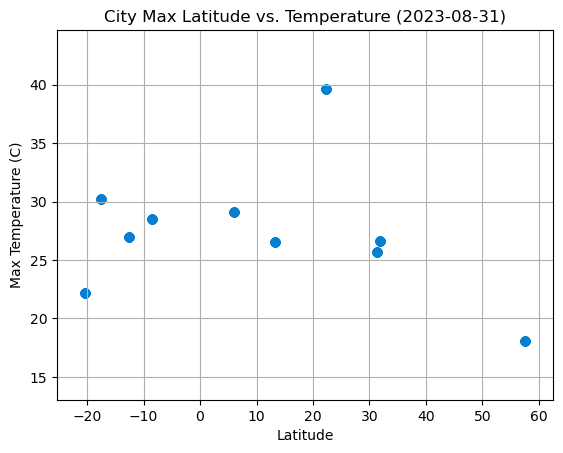

In [9]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Max Latitude vs. Temperature (2023-08-31)")
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

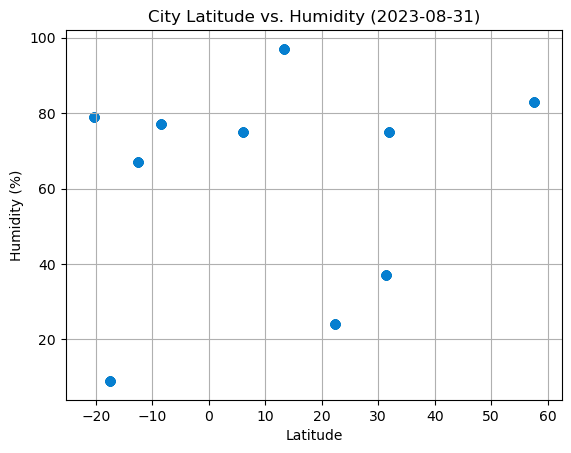

In [10]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Latitude vs. Humidity (2023-08-31)")
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

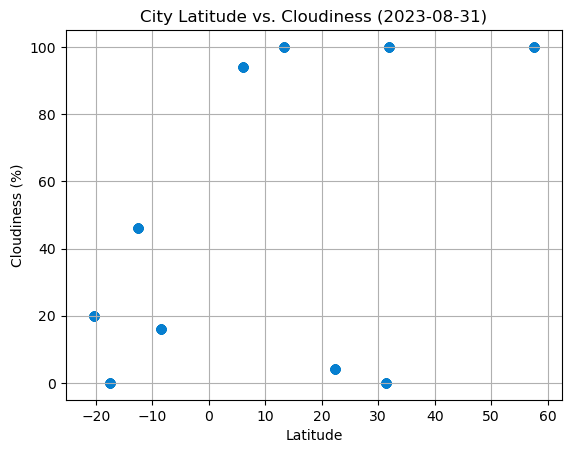

In [11]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2023-08-31)")
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

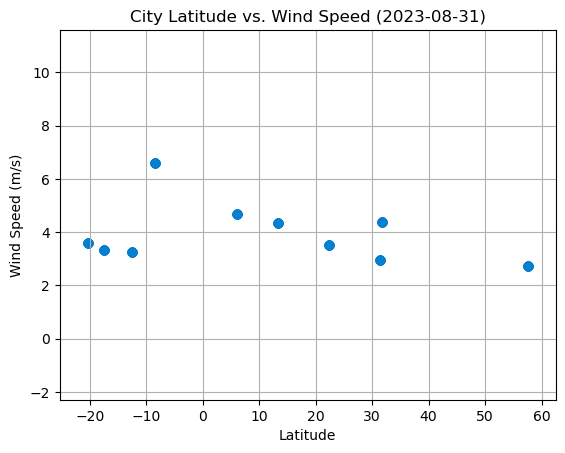

In [12]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, c="#067FD0")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(y_axis.min() - 5, y_axis.max() + 5)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2023-08-31)")
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
50,adam,22.3756,57.5233,39.67,24,4,3.53,OM,1693475235
51,peace river,22.3756,57.5233,39.67,24,4,3.53,OM,1693475235
52,merizo village,22.3756,57.5233,39.67,24,4,3.53,OM,1693475235
53,punta umbria,22.3756,57.5233,39.67,24,4,3.53,OM,1693475235
54,pangody,22.3756,57.5233,39.67,24,4,3.53,OM,1693475235


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
1,isafjordur,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
2,namsos,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
3,mahina,-12.497,131.047,26.95,67,46,3.27,AU,1693475429
4,san patricio,-12.497,131.047,26.95,67,46,3.27,AU,1693475429


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.36345239518067535


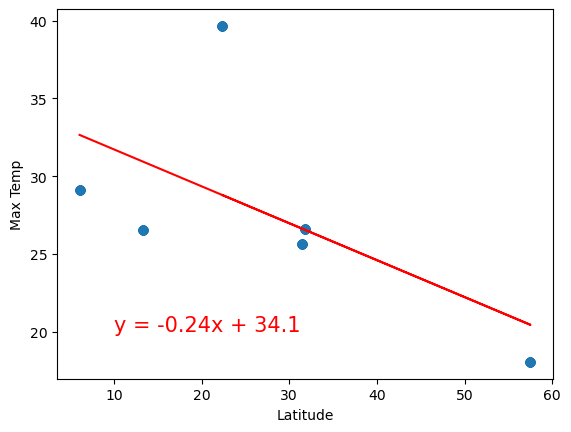

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (10, 20), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.2536232208033932


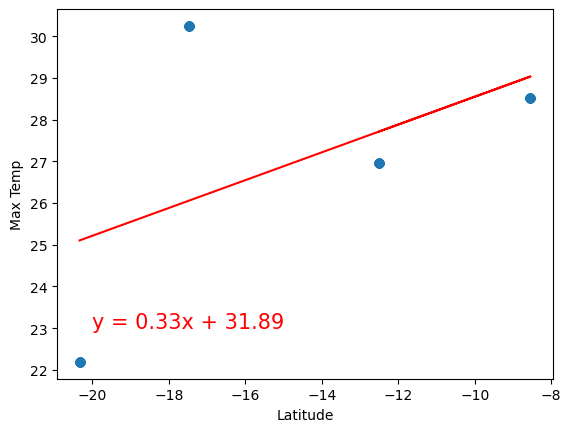

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (-20, 23), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **There is a correlation between latitude and max tempertaure for the sample size plotted in the graph. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.** 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00020967760609704383


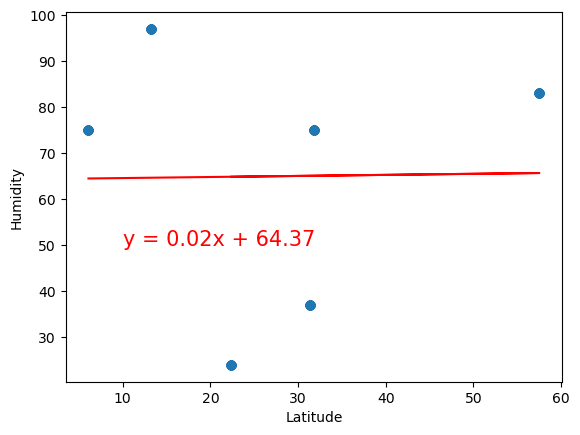

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (10, 50), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.08813595657671727


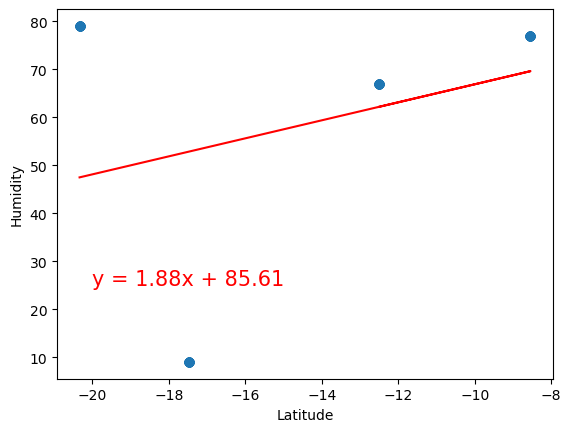

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-20, 25), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **There is a very correlation between latitude and humidity for the sample size selected for this analysis. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.** 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00213645727289384


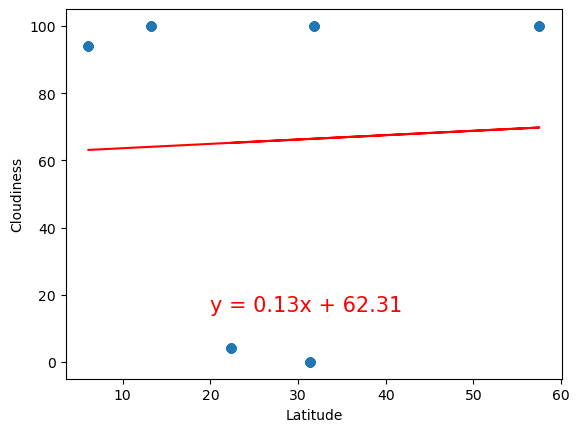

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (20, 15), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.08643094905735822


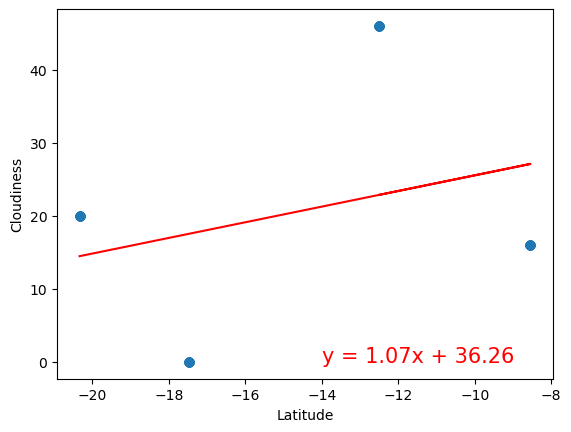

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-14, -0.04), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **There is a very correlation between latitude and cloudiness for the sample size selected for this analysis. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.** 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.626741726225089


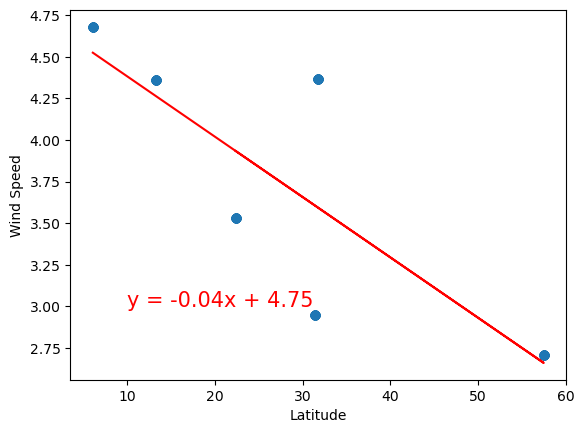

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (10, 3.0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5383020029194067


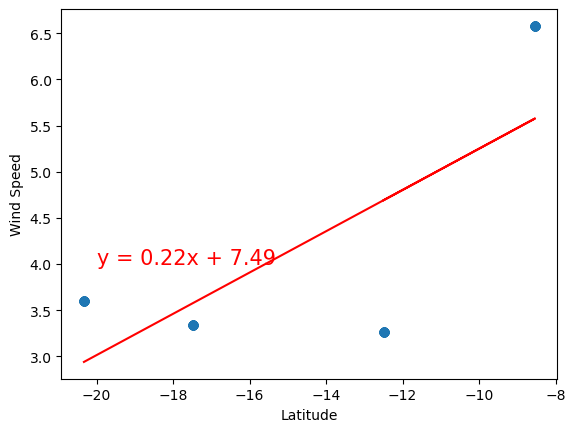

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-20, 4.0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** **For the sample size selected for the analysis a good coorelation is observed between latitude and wind speed. However, statitical analysis of other independent variables needs to be undertaken before making conclusions.**